This Notebook explores photon data sets and the basic response of the photoreceptor model.

OPERATION:
- Run a cell by pressing the **Play** button (the black triangle) in the toolbar above.
- Note that the execution of a cell may take a while, and will be confirmed by a printout.
- To remove all printed output and figures, select **Cell/All Output/Clear** at the top.

TROUBLESHOOTING:
- If the output of a cell contains a warning (the box turns pink), re-run to see if it disappears. 
- If the warning does not go away when re-running, try to proceed with the next cells. 
- If further commands go wrong, select **Kernel/Restart** at the top.
- You can also re-start by selecting **File/Close and Halt**

In [3]:
###Load the PyPlot package
import PyPlot
using GeneralizedMetropolisHastings
using GMHPhotoReceptor
println("Required packages loaded successfully")

Required packages loaded successfully


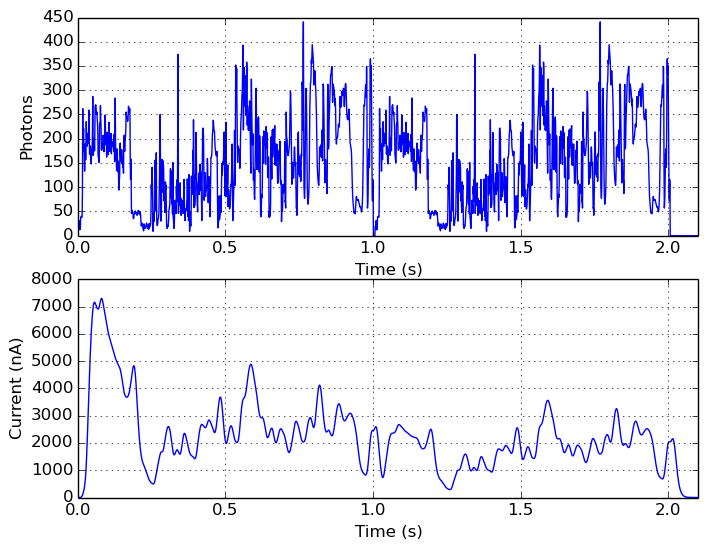

In [4]:
###Load and display the photon sequence
photonfilename = "../data/naturallight.jld"

photons1 = photonsequence(photonfilename)
current1 = lightinducedcurrent(photonfilename)

###Plot the photon sequence and measured current
PyPlot.figure("Photon and Measurement Data")
PyPlot.clf()
PyPlot.subplot(211)
PyPlot.plot(dataindex(photons1),datavalues(photons1))
PyPlot.xlabel("Time (s)")
PyPlot.ylabel("Photons")
PyPlot.xlim(dataindex(photons1)[1],dataindex(photons1)[end])
PyPlot.grid("on")

PyPlot.subplot(212)
PyPlot.plot(dataindex(current1),datavalues(current1))
PyPlot.xlabel("Time (s)")
PyPlot.ylabel("Current (nA)")
PyPlot.xlim(dataindex(current1)[1],dataindex(current1)[end])
PyPlot.grid("on")

In [9]:
###Settings for the model
numvilli1 = 30000

#specify the values that determine the priors on the parameters
latencylocation = (2.0,3.5) #uniform distribution with (low,high) values
latencyscale = (0.2,0.7) #uniform distribution with (low,high) values
refractorylocation = (4.0,6.0) #uniform distribution with (low,high) values
refractoryscale = (1.5,2.5) #uniform distribution with (low,high) values
bumpamplitude = (3.0,5.0) #uniform distribution with (low,high) values
bumpshape = (log(3.0),0.3) #lognormal distribution with (location,scale) values
bumpscale = (log(2.5),0.3) #lognormal distribution with (location,scale) values

#4-parameter model with stochastic latency and refractory parameters and fixed bump parameters
mpolicy4 = policy(:photoreceptor;bump=:fixed)
params4 = parameters(:photoreceptor,mpolicy4,
                     latencylocation,latencyscale,refractorylocation,refractoryscale)

#7-parameter model with latency, refractory and bump parameters
mpolicy7 = policy(:photoreceptor;bump=:sample) 
params7 = parameters(:photoreceptor,mpolicy7,
                     latencylocation,latencyscale,refractorylocation,refractoryscale,
                     bumpamplitude,bumpshape,bumpscale)

variance1 = [3600.0]

println("=====================================")
println("Model parameters defined successfully")
println("=====================================")

Model parameters defined successfully


In [6]:
###Plot the distributions of model parameters

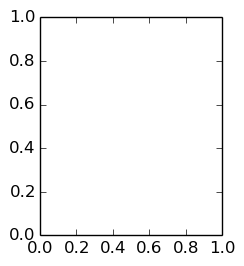

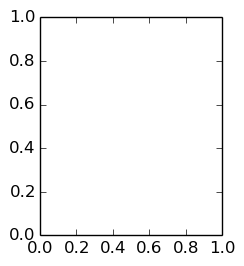

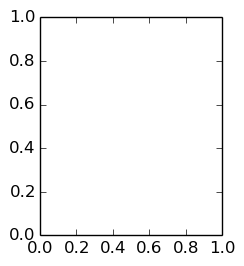

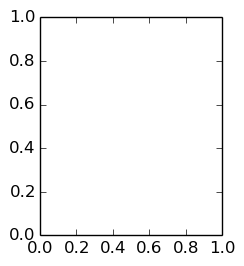

[3.278089968623649,0.49563140249197324,5.062664264137743,1.8148766961255698,4.782826732648935,1.8242303449897674,2.0835065062601945]
[3.156849438836753,0.5927888674965159,4.254930181470046,2.318836003298991,3.50485891009355,2.0113259980362415,3.609780724695374]
[3.3146957139431867,0.3005121518819593,4.171848391750178,2.2905182800119963,4.97834227238886,3.141759427863694,2.1148060841005454]
[2.273907124924817,0.3255431546017299,5.006152064963189,1.8884227134502323,3.8418037754686822,3.423630825339289,3.4689345541340053]


In [10]:
###Plot some examples of quantum bumps for random values drawn from the priors
#PyPlot.figure("Four-Parameter Model Bumps")
priorinit = trait(:initialize,:prior)
for i=1:4
    PyPlot.figure()
    v = GeneralizedMetropolisHastings.initvalues(priorinit,params4,Float64)
    PyPlot.subplot(231)
    
end

#PyPlot.figure("Seven-Parameter Model Bumps")
for i=1:4
    #subplot(220+i)
    v = GeneralizedMetropolisHastings.initvalues(priorinit,params7,Float64)
    println(v)
end

In [11]:
###Create a PhotoReceptor model
model4 = model(:photoreceptor,params4,photons1,current1,variance1,numvilli1,mpolicy4)
model7 = model(:photoreceptor,params7,photons1,current1,variance1,numvilli1,mpolicy7)

###Show the model
println("===========================")
println("Models defined successfully")
println("===========================")
show(model4)
show(model7)

Models defined successfully
Model PhotoReceptorModel
parameters: Array{AbstractParameter} with
[1] ParameterUnivariate
 key: latencylocation
 prior: Distributions.Uniform(a=2.0, b=3.5)
 default: 2.75
[2] ParameterUnivariate
 key: latencyscale
 prior: Distributions.Uniform(a=0.2, b=0.7)
 default: 0.44999999999999996
[3] ParameterUnivariate
 key: refractorylocation
 prior: Distributions.Uniform(a=4.0, b=6.0)
 default: 5.0
[4] ParameterUnivariate
 key: refractoryscale
 prior: Distributions.Uniform(a=1.5, b=2.5)
 default: 2.0
photons: DataArray with 1 variable and 2100 values
 index: Array{Float32,1}
 values: Array{Int64,1}
measurements: DataArray with 1 variable and 2100 values
 index: Array{Float32,1}
 values: Array{Float64,1}
noisemodel: Gaussian Noise Model
 variance: Array{Float64,1}
 distributions: Array{Distributions.Normal,1}
policy: PhotoReceptorPolicy with traits:
  latency = lognormal
  refractory = lognormal
  bump = fixed
  FixedBumpShapeParameters with values:
    amplitude =

Evaluating the model 100 times


4-element Array{Float64,1}:
 2.78715 
 0.498923
 4.37267 
 2.42488 

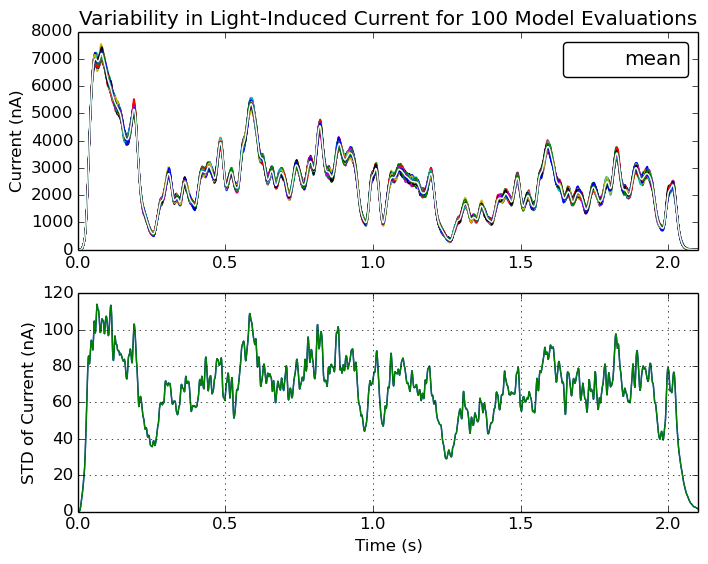

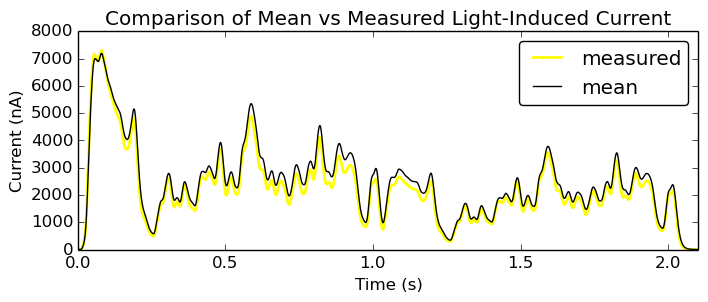

Evaluation paramater values: 
Mean Log-Posterior for these parameters: -31840.985729685457


In [17]:
###Evaluate the model for a set of random parameter values and plot the fit
###You can execute this cell as many times as you like
###Parameter values are drawn from the prior distributions on the parameters
numevaluations = 100
paramvals = GeneralizedMetropolisHastings.initvalues!(trait(:initialize,:prior),params4,zeros(Float64,length(params4)))
println("Evaluating the model $numevaluations times")
evaldata = evaluate!(model4,paramvals,numevaluations)
logposteriorvals = zeros(numevaluations)
for i=1:numevaluations
    logposteriorvals[i] = loglikelihood(model4,evaldata[:,i])+logprior(params4,paramvals,Float64)
end
meanevaldata = mean(evaldata,2)
stdevaldata = std(evaldata,2)

PyPlot.figure("PhotoReceptor Model Evaluations")
PyPlot.subplot(211)
PyPlot.plot(dataindex(model4),evaldata)
PyPlot.plot(dataindex(model4),meanevaldata;label="mean",linewidth=1,color="white")
PyPlot.xlim(dataindex(model4)[1],dataindex(model4)[end])
PyPlot.legend(loc="upper right",fancybox="true")
PyPlot.ylabel("Current (nA)")
PyPlot.title("Variability in Light-Induced Current for 100 Model Evaluations")
PyPlot.subplot(212)
PyPlot.plot(dataindex(model4),stdevaldata)
PyPlot.plot(dataindex(model4),mean(stdevaldata,2),linewidth=1)
PyPlot.xlim(dataindex(model4)[1],dataindex(model4)[end])
PyPlot.xlabel("Time (s)")
PyPlot.ylabel("STD of Current (nA)")
PyPlot.grid("on")

PyPlot.figure("PhotoReceptor Measured vs Model Fit")
PyPlot.subplot(211)
PyPlot.plot(dataindex(model4),measurements(model4);label="measured",linewidth=2,color="yellow")
PyPlot.plot(dataindex(model4),meanevaldata;label="mean",linewidth=1,color="black")
PyPlot.xlim(dataindex(model4)[1],dataindex(model4)[end])
PyPlot.xlabel("Time (s)")
PyPlot.ylabel("Current (nA)")
PyPlot.legend(loc="upper right",fancybox="true")
PyPlot.title("Comparison of Mean vs Measured Light-Induced Current")

println("Evaluation paramater values: ")
display(paramvals)
println("Mean Log-Posterior for these parameters: ",mean(logposteriorvals))